# **Pulse Vital Model**

In [ ]:
# library for data manipulation
import pandas as pd

# split data into training and test data
from sklearn.model_selection import train_test_split

# deep learning models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# library to normalize data
from sklearn.preprocessing import StandardScaler

# machine learning models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# model metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

# libraries for data visualization
import seaborn as sns,
import matplotlib.pyplot as plt

# Load data

In [ ]:
data = pd.read_csv('synthetic_health_data.csv')

# Data overview

In [ ]:
data.head()

,blood pressure,heart rate,diabetes,age,output
0,159,105,131,62,High
1,123,82,106,41,Medium
2,132,78,121,38,Medium
3,163,107,178,79,High
4,125,82,103,43,Medium


In [ ]:
data.describe()

,blood pressure,heart rate,diabetes,age
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,130.077000,81.191500,118.200000,44.072000
std,21.706996,14.137176,32.716589,15.611556
min,100.000000,60.000000,80.000000,20.000000
25%,113.000000,69.000000,92.000000,33.000000
50%,126.000000,79.000000,109.000000,40.000000
75%,142.250000,91.250000,134.250000,54.000000
max,180.000000,110.000000,200.000000,80.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   blood pressure  2000 non-null   int64 
 1   heart rate      2000 non-null   int64 
 2   diabetes        2000 non-null   int64 
 3   age             2000 non-null   int64 
 4   output          2000 non-null   object
dtypes: int64(4), object(1)
memory usage: 78.3+ KB


In [ ]:
# describe the shape of data
print("Shape of data : ", data.shape)
print("Classes : ", data["output"].unique())

Shape of data :  (2000, 5)
Classes :  ['High' 'Medium' 'Low']


In [ ]:
# Count the null values
data.isnull().sum()

,0
blood pressure,0
heart rate,0
diabetes,0
age,0
output,0


In [ ]:
# count the number of duplicates
print("The number of duplicates : ", data.duplicated().sum())

The number of duplicates :  4


In [ ]:
# count number of samples for each class
data.groupby("output").describe()

blood pressure                                       ...   age                        
                count        mean        std    min    25%  ...   min   25%   50%   75%   max
output                                                      ...                              
High            525.0  160.763810  11.649519  141.0  151.0  ...  50.0  58.0  65.0  73.0  80.0
Low             821.0  110.221681   6.099746  100.0  105.0  ...  20.0  25.0  30.0  35.0  40.0
Medium          650.0  130.447692   5.709010  121.0  126.0  ...  35.0  39.0  45.0  50.0  55.0

[3 rows x 32 columns]

# Data visualisation

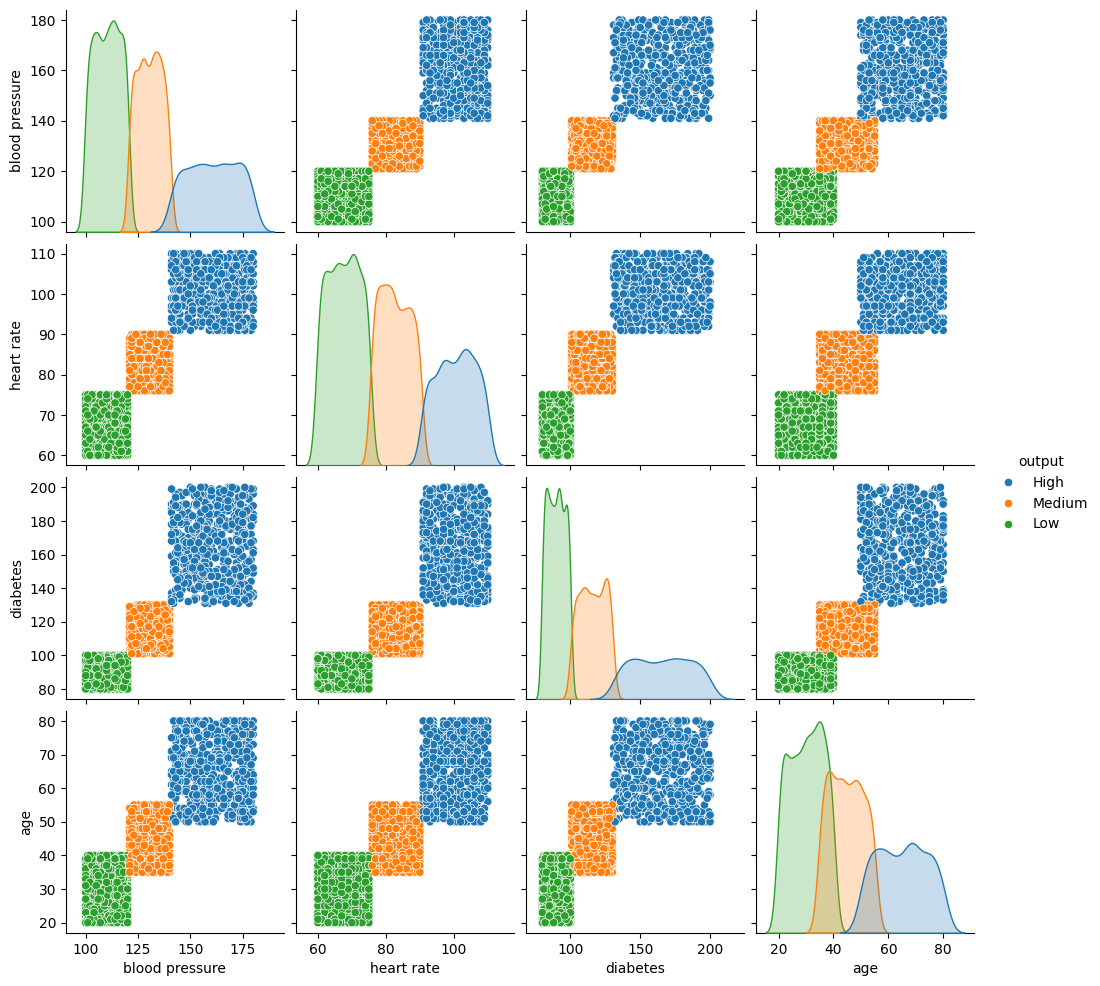

In [ ]:
# visualize all the data
sns.pairplot(data, hue="output")

<ipython-input-48-6ef8745f57b9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data["output"], palette= "Accent")


<Axes: xlabel='count', ylabel='output'>

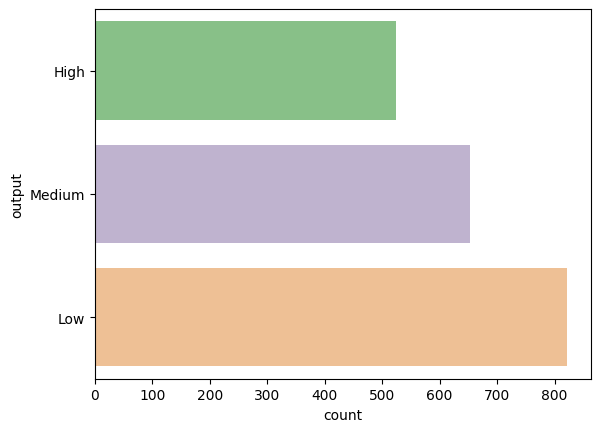

In [ ]:
sns.countplot(data = data["output"], palette= "Accent")

# Data preprocessing

In [ ]:
# remove duplicates
data.drop_duplicates(inplace=True)

# check if still have duplicates
print("Number of duplicates : ", data.duplicated().sum())

Number of duplicates :  0


In [ ]:
# split data
x = data[["blood pressure", "heart rate", "diabetes", "age"]]
y = data["output"]

$$ Low ----> 0 $$
$$ Medium ----> 1 $$
$$ High ----> 2 $$

In [ ]:
y = y.replace(["Low", "Medium", "High"], [0, 1, 2])

<ipython-input-75-c3bc96df09a9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(["Low", "Medium", "High"], [0, 1, 2])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(1796, 4)
(1796,)
(200, 4)
(200, 4)


# Machine learning Models training

In [ ]:
# the list of models which want to test for training a performant model
models = {
    'SVC' : SVC(
        kernel = 'rbf',
        C = 1.0,
        gamma = 'scale',
        probability = True
        ),
    'XGBClassifier' : XGBClassifier(
        n_estimators = 100,
        learning_rate = 0.1,
        max_depth = 5,
        random_state = 42),
    'RandomForestClassifier' : RandomForestClassifier(
        n_estimators = 100,
        max_depth = 10,
        min_samples_split = 5,
        min_samples_leaf = 2,
        random_state = 42
        ),
    'MLPClassifier' : MLPClassifier(
        hidden_layer_sizes = (50, 25),
        activation = 'relu',
        solver = 'adam',
        alpha = 0.0001,
        learning_rate = 'adaptive',
        max_iter = 300,
        random_state = 42
    )
    }

In [ ]:
# method to calculate the metrics of each model
def loss(y_true, y_pred, retur = False) :
  precision = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average = 'macro')
  accuracy = accuracy_score(y_true, y_pred)
  if retur :
    return precision, recall, accuracy
  else :
    print("Precision : ", precision)
    print("Recall : ", recall)
    print("Accuracy : ", accuracy)

In [ ]:
# method to train the models we chosen
def train_and_evaluate(models, x_train, y_train, x_test, y_test) :
    for name, model in models.items() :
      print(name, ":")
      model.fit(x_train, y_train)
      loss(y_test, model.predict(x_test))
      print("*" * 30)


In [ ]:
train_and_evaluate(models, x_train, y_train, x_test, y_test)

SVC :
Precision :  1.0
Recall :  1.0
Accuracy :  1.0
******************************
XGBClassifier :
Precision :  1.0
Recall :  1.0
Accuracy :  1.0
******************************
RandomForestClassifier :
Precision :  1.0
Recall :  1.0
Accuracy :  1.0
******************************
MLPClassifier :
Precision :  0.7545981355505164
Recall :  0.7416518122400476
Accuracy :  0.745
******************************


# Machine learning Model chosen  

In [ ]:
# Random forest algorithm
model = RandomForestClassifier(
          n_estimators = 100,
          max_depth = 10,
          min_samples_split = 5,
          min_samples_leaf = 2,
          random_state = 42
        )

model.fit(x_train, y_train)

# Deep learning Model

In [ ]:
# normalize data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
# the model architecture
dp_model = Sequential()
dp_model.add(Dense(64, activation = 'relu', input_shape = (4,)))
dp_model.add(Dense(32, activation = 'relu'))
dp_model.add(Dense(3, activation = 'softmax')) # softmax better for multiclass classification

In [ ]:
# compile the model
dp_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
) # sparse_categorical_crossentropy is better for integer encoded labels

In [ ]:
# tarin the model
history = dp_model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 4.8346e-04 - val_accuracy: 1.0000 - val_loss: 7.7781e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 3.1589e-04 - val_accuracy: 1.0000 - val_loss: 7.3273e-04
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 1.0000 - loss: 4.1190e-04 - val_accuracy: 1.0000 - val_loss: 7.9571e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 1.7520e-04 - val_accuracy: 1.0000 - val_loss: 7.3257e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.2385e-04 - val_accuracy: 1.0000 - val_loss: 7.3707e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 2.8695e-04 - val_accuracy: 1.0000 - val_loss: 7.7340e-04
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.4479e-04 - val_accuracy: 1.0000 - val_loss: 6.7295e-04
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accura

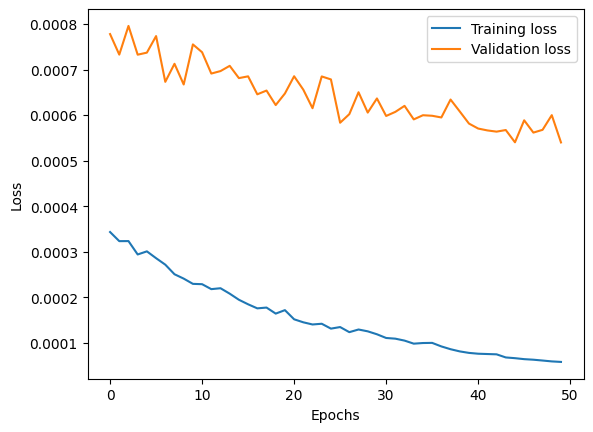

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# evaluate the model
val_loss, accu = dp_model.evaluate(x_test, y_test)
print("Validation loss : ", val_loss)
print("Accuracy : ", accu)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.1453e-05 
Validation loss :  2.139106800314039e-05
Accuracy :  1.0


In [ ]:
# convert it to tensorflow lite
converter = tf.lite.TFLiteConverter.from_keras_model(dp_model)
pulse_vital_model = converter.convert()

# save the model
with open('pulse_vital_model.tflite', 'wb') as f :
  f.write(pulse_vital_model)

Saved artifact at '/tmp/tmpa01771jc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139584690819280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139584690819472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139584690817168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139584690819856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139584690820048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139584690822736: TensorSpec(shape=(), dtype=tf.resource, name=None)
